<a href="https://colab.research.google.com/github/chananelz/Research/blob/master/preliminary_research/young_adult_vgg16_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
import matplotlib.pyplot as plt
import random
import numpy as np
import numpy
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras.callbacks import ReduceLROnPlateau
from keras.datasets import cifar10
from keras.layers import Add, Dense, Activation, BatchNormalization, Conv2D
from keras.layers import Flatten
from keras.layers.convolutional import MaxPooling2D
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import tensorflow_datasets as tfds
import tensorflow as tf
from keras.utils import np_utils
from keras.initializers import glorot_uniform
%matplotlib inline

In [3]:
model_type = 'vgg16'

In [4]:
model_home_dir = os.path.join(os.getcwd(), 'CNN_TASK_ODED',"model_type")
print(model_home_dir)
if not os.path.isdir(model_home_dir):
    print('Inside mkdir')
    os.makedirs(model_home_dir)

/content/CNN_TASK_ODED/model_type


In [5]:
#Defining Variables

#Data set information
DATASET = 'cifar-10'
num_classes = 2
input_shape=(32,32,3)
epochs = 200
lrate = 0.01
decay = lrate/epochs
batch_size = 32
seed = 7
np.random.seed(seed)

validate_dir = os.path.join("data","test")
train_dir = os.path.join("data","train")

# Prepare model model saving directory.
save_dir = os.path.join(model_home_dir, 'saved_models')

model_name = DATASET+'_'+'%s_model.{epoch:03d}.h5' % model_type

if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
filepath = os.path.join(save_dir, model_name)
print("Model Type: ",model_type)
print("Model File: ",filepath)

Model Type:  vgg16
Model File:  /content/CNN_TASK_ODED/model_type/saved_models/cifar-10_vgg16_model.{epoch:03d}.h5


In [1]:
!pip install -q kaggle
from google.colab import files
files.upload()
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json
!kaggle datasets download jessicali9530/celeba-dataset
!unzip -d dataset celeba-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: dataset/img_align_celeba/img_align_celeba/197604.jpg  
  inflating: dataset/img_align_celeba/img_align_celeba/197605.jpg  
  inflating: dataset/img_align_celeba/img_align_celeba/197606.jpg  
  inflating: dataset/img_align_celeba/img_align_celeba/197607.jpg  
  inflating: dataset/img_align_celeba/img_align_celeba/197608.jpg  
  inflating: dataset/img_align_celeba/img_align_celeba/197609.jpg  
  inflating: dataset/img_align_celeba/img_align_celeba/197610.jpg  
  inflating: dataset/img_align_celeba/img_align_celeba/197611.jpg  
  inflating: dataset/img_align_celeba/img_align_celeba/197612.jpg  
  inflating: dataset/img_align_celeba/img_align_celeba/197613.jpg  
  inflating: dataset/img_align_celeba/img_align_celeba/197614.jpg  
  inflating: dataset/img_align_celeba/img_align_celeba/197615.jpg  
  inflating: dataset/img_align_celeba/img_align_celeba/197616.jpg  
  inflating: dataset/img_align_celeba/img_align_celeba/197617.jpg

------------------concatenate train-------------------


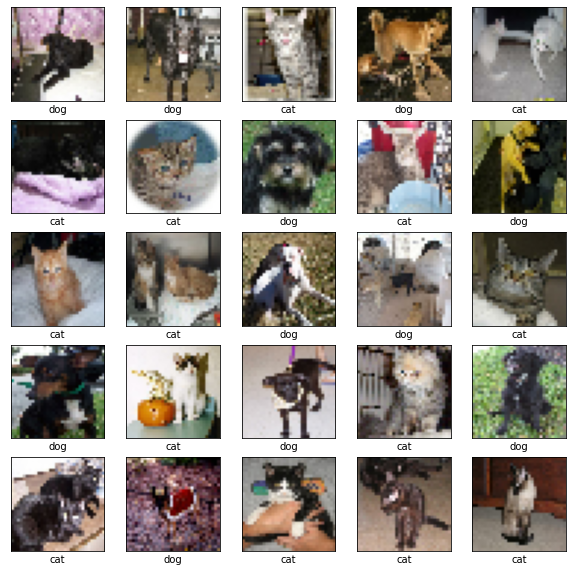

------------------concatenate test-------------------


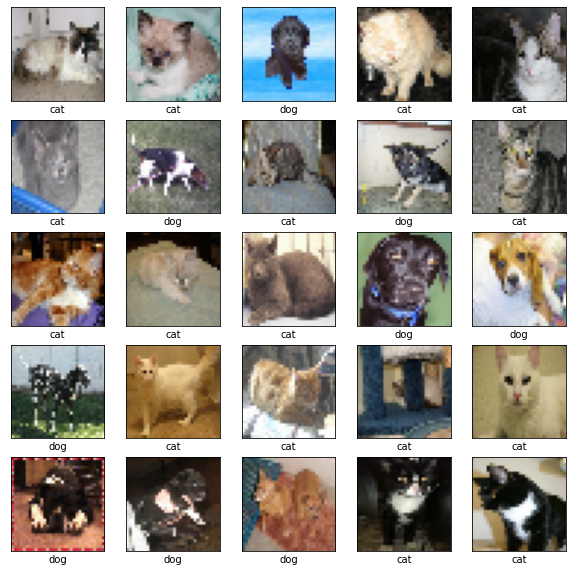

In [ ]:
class_names = ['young', 'adult']

print("------------------concatenate train-------------------")
plt.figure(figsize=(10,10))
for i in range(25):
    j = random.randint(0,19773)
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[j])
    plt.xlabel(class_names[y_train[j][0]])
plt.show()

print("------------------concatenate test-------------------")
plt.figure(figsize=(10,10))
for i in range(25):
    j = random.randint(0,3489) 
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[j])
    plt.xlabel(class_names[y_test[j][0]])
plt.show()

In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')


X_train_mean = np.mean(X_train)
X_train -= X_train_mean
X_test_mean = np.mean(X_test)
X_test -= X_test_mean

y_train = np_utils.to_categorical(y_train,)
y_test = np_utils.to_categorical(y_test,)
y_train = np.delete(y_train,1,1)
y_test = np.delete(y_test,1,1)
print(y_train.shape, y_test.shape)



(19773, 1) (3489, 1)


In [ ]:
from tensorflow.keras.layers import Dropout
def vgg16(input_shape=(32,32,3), num_classes=2):
  model = Sequential()
  model.add(Conv2D(input_shape=input_shape,filters=64,kernel_size=(3,3),padding="same", activation="relu"))
  model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
  model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))


  model.add(Dropout(0.8))

  model.add(Conv2D(filters=16, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(Conv2D(filters=16, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

  # model.add(Conv2D(filters=32, kernel_size=(3,3), padding="same", activation="relu"))
  # model.add(Conv2D(filters=32, kernel_size=(3,3), padding="same", activation="relu"))
  # model.add(Conv2D(filters=32, kernel_size=(3,3), padding="same", activation="relu"))
  # model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

  # model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
  # model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
  # model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
  # model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

  # model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
  # model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
  # model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
  # model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

  model.add(Flatten())
  model.add(Dense(units=4096,activation="relu"))
  model.add(Dense(units=4096,activation="relu"))
  model.add(Dense(units=1, activation="sigmoid"))

  return model

In [ ]:
def lr_schedule(epoch):
    """Learning Rate Schedule

    Learning rate is scheduled to be reduced after 80, 120, 160, 180 epochs.
    Called automatically every epoch as part of callbacks during training.

    # Arguments
        epoch (int): The number of epochs

    # Returns
        lr (float32): learning rate
    """
    lr = 1e-3
    if epoch > 180:
        lr *= 0.5e-3
    elif epoch > 160:
        lr *= 1e-3
    elif epoch > 120:
        lr *= 1e-2
    elif epoch > 80:
        lr *= 1e-1
    print('Learning rate: ', lr)
    return lr


In [ ]:
# Prepare callbacks for model saving and for learning rate adjustment.

early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5, verbose=0, mode='auto', baseline=None, restore_best_weights=True)

checkpoint = ModelCheckpoint(filepath=filepath,
                             monitor='val_acc',
                             verbose=1,
                             save_best_only=True)

lr_scheduler = LearningRateScheduler(lr_schedule)

lr_reducer = ReduceLROnPlateau(factor=np.sqrt(0.1),
                               cooldown=0,
                               patience=5,
                               min_lr=0.5e-6)

callbacks = [checkpoint, lr_reducer, lr_scheduler,early_stopping]


In [ ]:
 model = vgg16(input_shape,num_classes)

# Compile model

# optimizer = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(loss= 'binary_crossentropy' , optimizer=optimizer, metrics=['accuracy'])
print("Model Summary of ",model_type)
print(model.summary())



Model Summary of  vgg16
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 16)        9232      
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 16)        2320      
                                

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
# Score trained model.
history = model.fit(X_train, y_train,
      batch_size=batch_size,
      epochs=epochs,
      validation_data=(X_test, y_test),
      shuffle=True,
      callbacks=callbacks)
scores = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Learning rate:  0.001
Epoch 1/200
618/618 [==============================] - ETA: 0s - loss: 0.6574 - accuracy: 0.6107

618/618 [==============================] - 196s 315ms/step - loss: 0.6574 - accuracy: 0.6107 - val_loss: 0.6066 - val_accuracy: 0.6710 - lr: 0.0010
Learning rate:  0.001
Epoch 2/200
618/618 [==============================] - ETA: 0s - loss: 0.5899 - accuracy: 0.6875

618/618 [==============================] - 195s 316ms/step - loss: 0.5899 - accuracy: 0.6875 - val_loss: 0.5552 - val_accuracy: 0.7142 - lr: 0.0010
Learning rate:  0.001
Epoch 3/200
618/618 [==============================] - ETA: 0s - loss: 0.5484 - accuracy: 0.7228

618/618 [==============================] - 191s 309ms/step - loss: 0.5484 - accuracy: 0.7228 - val_loss: 0.5334 - val_accuracy: 0.7320 - lr: 0.0010
Learning rate:  0.001
Epoch 4/200
618/618 [==============================] - ETA: 0s - loss: 0.5239 - accuracy: 0.7376

618/618 [==============================] - 189s 305ms/step - loss: 0.5239 - accuracy: 0.7376 - val_loss: 0.4935 - val_accuracy: 0.7615 - lr: 0.0010
Learning rate:  0.001
Epoch 5/200
618/618 [==============================] - ETA: 0s - loss: 0.5006 - accuracy: 0.7544

618/618 [==============================] - 188s 304ms/step - loss: 0.5006 - accuracy: 0.7544 - val_loss: 0.4894 - val_accuracy: 0.7681 - lr: 0.0010
Learning rate:  0.001
Epoch 6/200
618/618 [==============================] - ETA: 0s - loss: 0.4767 - accuracy: 0.7694

618/618 [==============================] - 186s 301ms/step - loss: 0.4767 - accuracy: 0.7694 - val_loss: 0.4722 - val_accuracy: 0.7779 - lr: 0.0010
Learning rate:  0.001
Epoch 7/200
618/618 [==============================] - ETA: 0s - loss: 0.4592 - accuracy: 0.7858

618/618 [==============================] - 186s 301ms/step - loss: 0.4592 - accuracy: 0.7858 - val_loss: 0.4903 - val_accuracy: 0.7538 - lr: 0.0010
Learning rate:  0.001
Epoch 8/200
618/618 [==============================] - ETA: 0s - loss: 0.4495 - accuracy: 0.7897

618/618 [==============================] - 187s 302ms/step - loss: 0.4495 - accuracy: 0.7897 - val_loss: 0.4558 - val_accuracy: 0.7827 - lr: 0.0010
Learning rate:  0.001
Epoch 9/200
618/618 [==============================] - ETA: 0s - loss: 0.4305 - accuracy: 0.7984

618/618 [==============================] - 185s 300ms/step - loss: 0.4305 - accuracy: 0.7984 - val_loss: 0.4409 - val_accuracy: 0.8028 - lr: 0.0010
Learning rate:  0.001
Epoch 10/200
618/618 [==============================] - ETA: 0s - loss: 0.4167 - accuracy: 0.8055

618/618 [==============================] - 184s 298ms/step - loss: 0.4167 - accuracy: 0.8055 - val_loss: 0.4520 - val_accuracy: 0.7891 - lr: 0.0010
Learning rate:  0.001
Epoch 11/200
618/618 [==============================] - ETA: 0s - loss: 0.3986 - accuracy: 0.8165

618/618 [==============================] - 185s 299ms/step - loss: 0.3986 - accuracy: 0.8165 - val_loss: 0.4381 - val_accuracy: 0.7999 - lr: 0.0010
Learning rate:  0.001
Epoch 12/200
618/618 [==============================] - ETA: 0s - loss: 0.3841 - accuracy: 0.8250

618/618 [==============================] - 185s 299ms/step - loss: 0.3841 - accuracy: 0.8250 - val_loss: 0.4639 - val_accuracy: 0.7916 - lr: 0.0010
Learning rate:  0.001
Epoch 13/200
618/618 [==============================] - ETA: 0s - loss: 0.3710 - accuracy: 0.8314

618/618 [==============================] - 185s 299ms/step - loss: 0.3710 - accuracy: 0.8314 - val_loss: 0.4429 - val_accuracy: 0.8131 - lr: 0.0010
Learning rate:  0.001
Epoch 14/200
618/618 [==============================] - ETA: 0s - loss: 0.3495 - accuracy: 0.8415

618/618 [==============================] - 185s 299ms/step - loss: 0.3495 - accuracy: 0.8415 - val_loss: 0.4885 - val_accuracy: 0.7899 - lr: 0.0010
Learning rate:  0.001
Epoch 15/200
618/618 [==============================] - ETA: 0s - loss: 0.3293 - accuracy: 0.8566

618/618 [==============================] - 185s 299ms/step - loss: 0.3293 - accuracy: 0.8566 - val_loss: 0.5165 - val_accuracy: 0.7698 - lr: 0.0010
Learning rate:  0.001
Epoch 16/200
618/618 [==============================] - ETA: 0s - loss: 0.3057 - accuracy: 0.8663

110/110 [==============================] - 7s 59ms/step - loss: 0.4381 - accuracy: 0.7999
Test loss: 0.43807852268218994
Test accuracy: 0.799942672252655


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


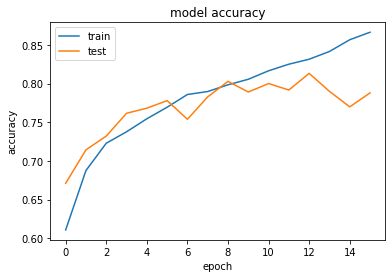

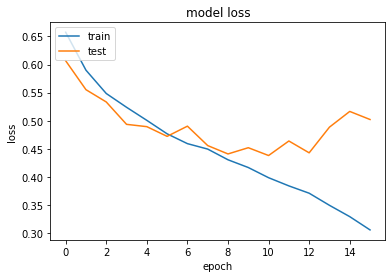

In [ ]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

110/110 [==============================] - 7s 59ms/step


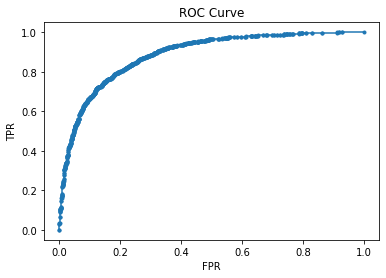

0.886257838484494


In [ ]:
from sklearn.metrics import roc_curve, auc

y_pred = model.predict(X_test).ravel()

nn_fpr_keras, nn_tpr_keras, nn_thresholds_keras = roc_curve(y_test, y_pred)
auc_keras = auc(nn_fpr_keras, nn_tpr_keras)
plt.plot(nn_fpr_keras, nn_tpr_keras, marker='.', label='Neural Network (auc = %0.3f)' % auc_keras)
plt.title('ROC Curve')
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.show()

print(auc_keras)

110/110 [==============================] - 7s 59ms/step


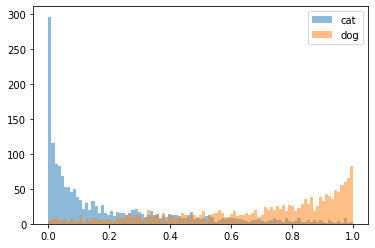

In [ ]:
from matplotlib import pyplot
predict_x=model.predict(X_test) 

cat_index = np.where(y_test.reshape(-1) == 0.)
cat = predict_x[cat_index]

dog_index = np.where(y_test.reshape(-1) == 1.)
dog = predict_x[dog_index]



bins = np.linspace(0, 1, 100)

pyplot.hist(cat, bins, alpha=0.5, label='cat')
pyplot.hist(dog, bins, alpha=0.5, label='dog')
pyplot.legend(loc='upper right')
pyplot.show()

In [ ]:
for X,Y in zip(predict_x,y_test):
    print("Model Score:", X, "actual score:", Y) 

Model Score: [0.8981078] actual score: [1.]
Model Score: [0.44705927] actual score: [0.]
Model Score: [0.05189358] actual score: [0.]
Model Score: [0.5865735] actual score: [1.]
Model Score: [0.5169076] actual score: [1.]
Model Score: [0.74519104] actual score: [1.]
Model Score: [0.40285057] actual score: [0.]
Model Score: [0.18092377] actual score: [0.]
Model Score: [0.23416175] actual score: [1.]
Model Score: [0.4553019] actual score: [1.]
Model Score: [0.07055248] actual score: [0.]
Model Score: [0.01387462] actual score: [0.]
Model Score: [0.3192748] actual score: [0.]
Model Score: [0.3058717] actual score: [0.]
Model Score: [0.00420986] actual score: [0.]
Model Score: [0.12381587] actual score: [0.]
Model Score: [0.5853528] actual score: [1.]
Model Score: [0.34082484] actual score: [0.]
Model Score: [0.18268465] actual score: [1.]
Model Score: [0.12175378] actual score: [0.]
Model Score: [0.69326884] actual score: [1.]
Model Score: [0.62066835] actual score: [1.]
Model Score: [0.7